<h1>Mall Customer Segmentation</h1>
<h1>Problem Statement</h1>
    <p>The dataset provided contains customer information, including demographics and spending behavior, for a retail business. The objective is to segment the customers into distinct groups based on their annual income and spending score. This will help in identifying different customer profiles and understanding patterns in purchasing behavior, enabling the business to tailor marketing strategies and optimize product offerings. The analysis could also reveal insights on how income and age affect customer spending, helping to improve customer targeting and engagement.</p>
    <h2>Dataset Description</h2>
    <p>The dataset consists of 5 rows and 5 columns with the following attributes:</p>
    <ul>
        <li><strong>CustomerID</strong>: A unique identifier for each customer (integer).</li>
        <li><strong>Gender</strong>: The gender of the customer (Male/Female).</li>
        <li><strong>Age</strong>: The age of the customer (integer, age in years).</li>
        <li><strong>Annual Income (k$)</strong>: The annual income of the customer in thousands of dollars (integer).</li>
        <li><strong>Spending Score (1-100)</strong>: A score assigned to the customer based on their spending behavior, where 1 indicates low spending and 100 indicates high spending (integer).</li>
    </ul>
    <p>The data can be used for clustering, predictive modeling, or analysis to understand the relationship between income, age, and spending score, as well as to develop personalized customer experiences.</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [5]:
df.std()

CustomerID                57.879185
Gender                     0.497633
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

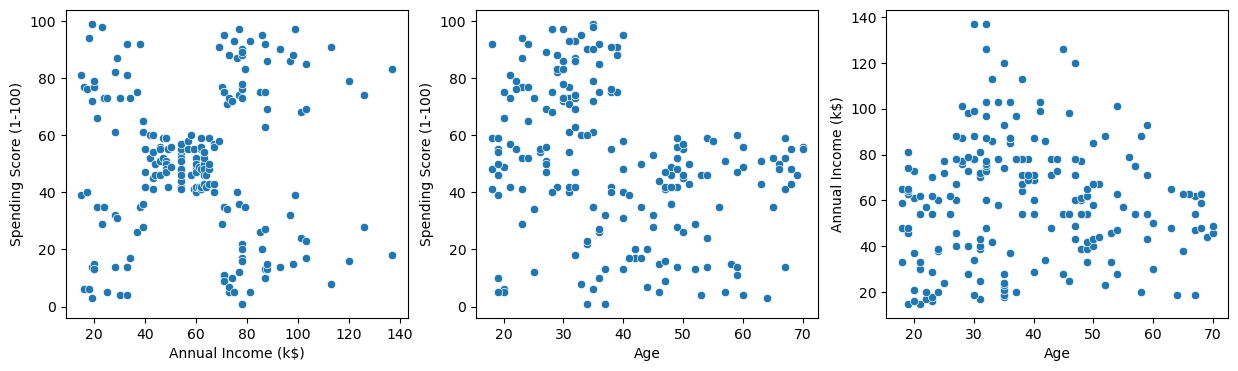

In [6]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(df,x='Annual Income (k$)',y='Spending Score (1-100)')

plt.subplot(1,3,2)
sns.scatterplot(df,x='Age',y='Spending Score (1-100)')


plt.subplot(1,3,3)
sns.scatterplot(df,y='Annual Income (k$)',x='Age')




In [7]:
df.groupby('Gender')['Spending Score (1-100)'].sum()

Gender
0    5771
1    4269
Name: Spending Score (1-100), dtype: int64

In [8]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


Silhouette Score for income_cluster: 0.553931997444648


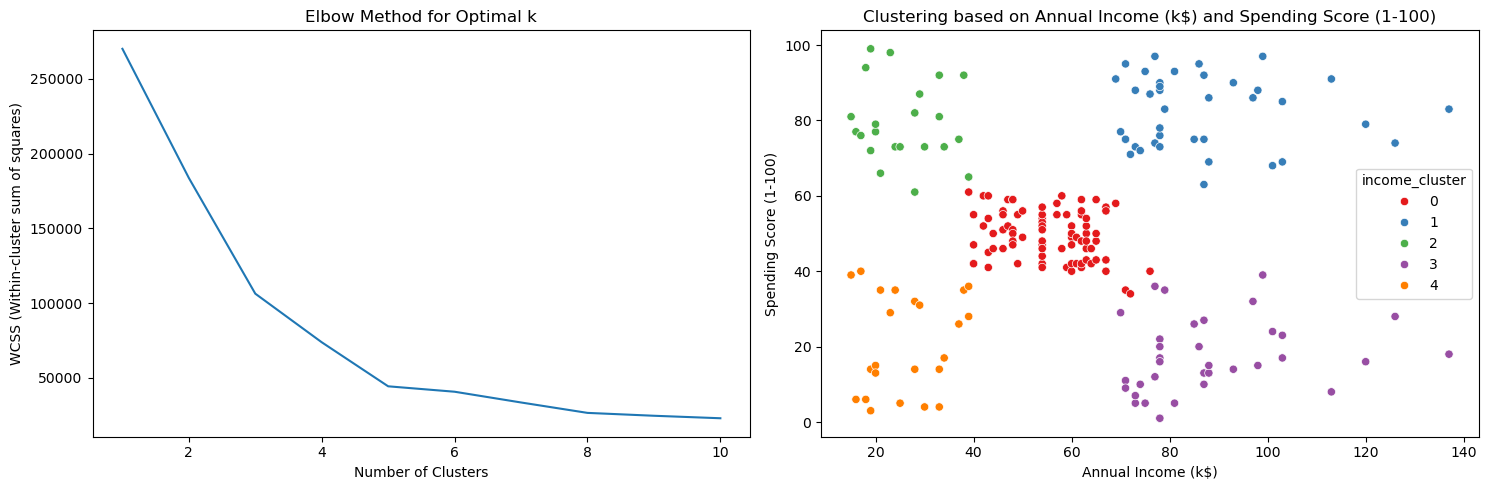

Silhouette Score for age_cluster: 0.4692341232501655


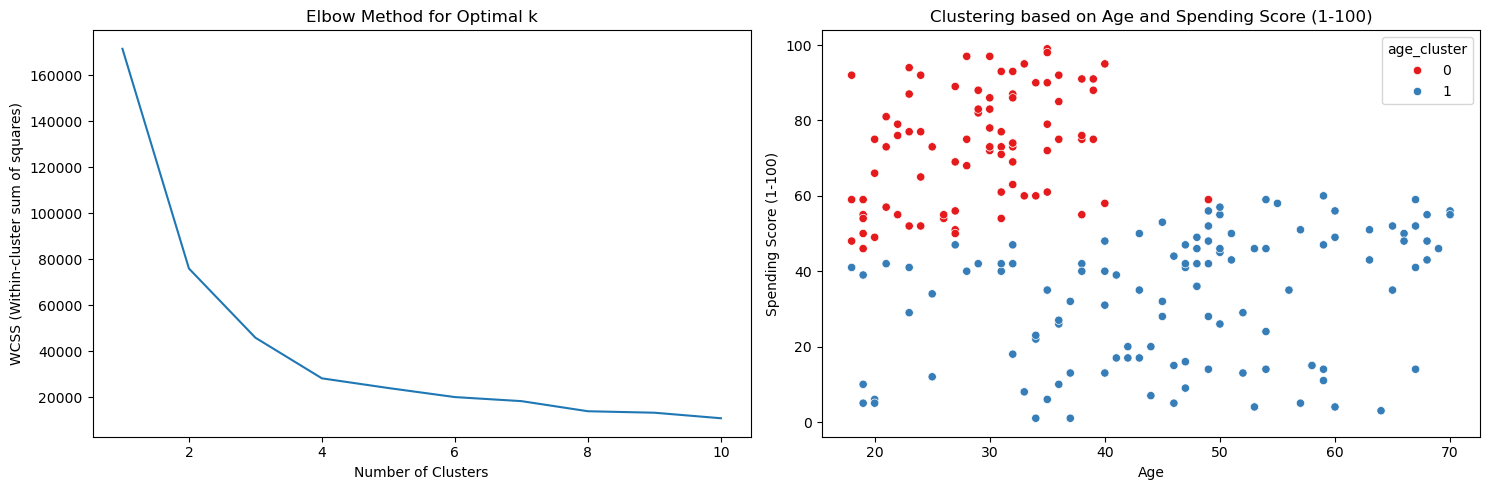

Silhouette Score for age_income_cluster: 0.42300000631806584


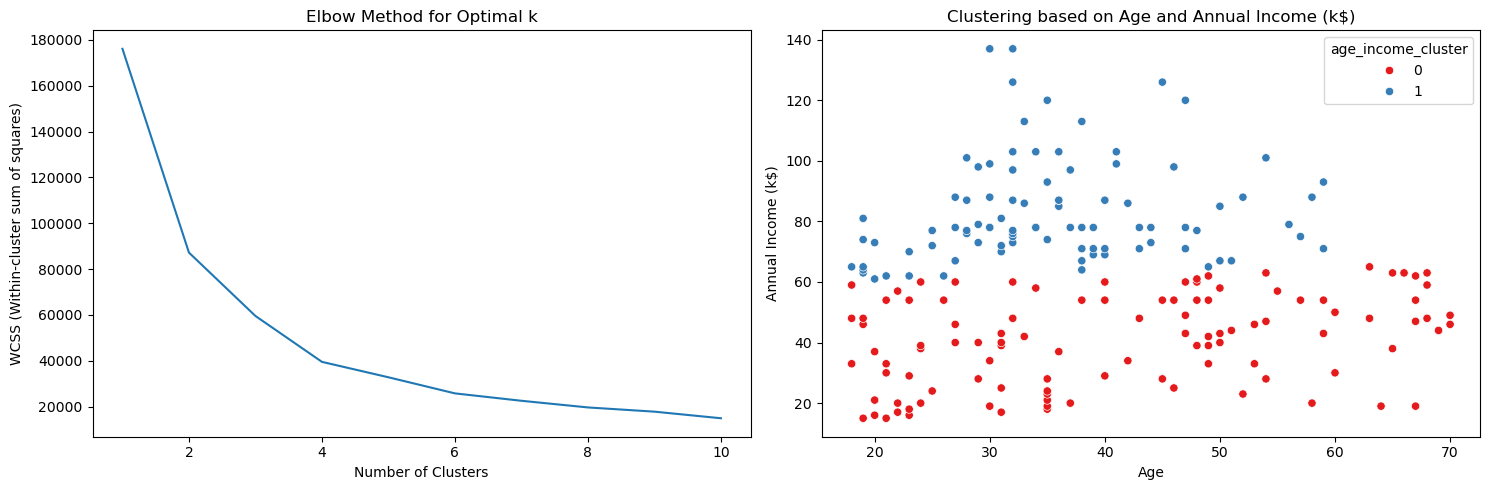

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def clustering(df, cluster1, cluster2, new_cluster_name,cluster_size,isFlaged):
    # Selecting the features for clustering
    x = df[[cluster1, cluster2]]
    
    # Scaling the features using StandardScaler
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(x)

    X_scaled=x
    
    # Elbow Method to find the optimal number of clusters (k)
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    
    # Create a figure with two subplots in one row
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow Plot (first plot)
    axes[0].plot(range(1, 11), wcss)
    axes[0].set_title('Elbow Method for Optimal k')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel('WCSS (Within-cluster sum of squares)')
    
    # Based on the elbow curve, choose k = 5 (or any optimal value from the curve)
    kmeans = KMeans(n_clusters=(cluster_size if isFlaged else 5), random_state=42)
    
    # Fit KMeans and assign cluster labels to the dataframe
    df[new_cluster_name] = kmeans.fit_predict(X_scaled)

   
    # Clustering Scatter Plot (second plot)
    sns.scatterplot(data=df, x=cluster1, y=cluster2, hue=new_cluster_name, ax=axes[1], palette='Set1', legend='full',markers='*')
    axes[1].set_title(f'Clustering based on {cluster1} and {cluster2}')

    # Silhouette Score Calculation
    silhouette_avg = silhouette_score(X_scaled, df[new_cluster_name])
    print(f'Silhouette Score for {new_cluster_name}: {silhouette_avg}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

        

clustering(df,'Annual Income (k$)', 'Spending Score (1-100)','income_cluster',5,True)
clustering(df,'Age', 'Spending Score (1-100)','age_cluster',2,True)

clustering(df,'Age', 'Annual Income (k$)','age_income_cluster',2,True)


<h1>Clustering interpretation</h1>
<h3>Income Cluster:</h3>
<ul>
    <li><strong>Cluster 1:</strong> Low-income, low-spending individuals.</li>
    <li><strong>Cluster 2:</strong> High-income, high-spending individuals.</li>
    <li><strong>Cluster 3:</strong> Low-income, high-spending individuals.</li>
    <li><strong>Cluster 4:</strong> Average-income, average-spending individuals.</li>
    <li><strong>Cluster 5:</strong> High-income, low-spending individuals.</li>
</ul>
<h3>Age Cluster:</h3>
<ul>
    <li><strong>Cluster 0:</strong> Younger customers with low spending; budget-conscious.</li>
    <li><strong>Cluster 1:</strong> Older customers with high spending; prefer premium products.</li>
</ul>
<h3>Age-Income Cluster:</h3>
<ul>
    <li><strong>Cluster 0 (Red):</strong> Young, lower-income individuals (ages 20-40).</li>
    <li><strong>Cluster 1 (Blue):</strong> Older, higher-income individuals (ages 20-70).</li>
</ul>


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster,age_cluster,age_income_cluster
0,1,1,19,15,39,4,1,0
1,2,1,21,15,81,2,0,0
2,3,0,20,16,6,4,1,0
3,4,0,23,16,77,2,0,0
4,5,0,31,17,40,4,1,0


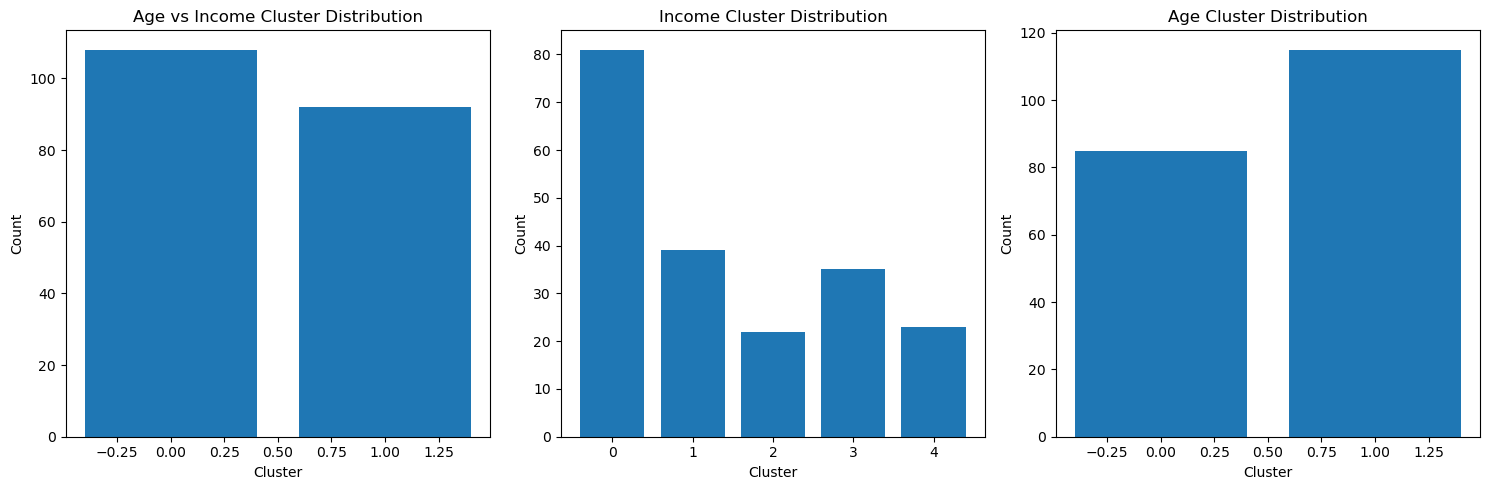

In [11]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'age_income_cluster'
axes[0].bar(df['age_income_cluster'].value_counts().index, df['age_income_cluster'].value_counts())
axes[0].set_title('Age vs Income Cluster Distribution')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')

# Plot for 'income_cluster'
axes[1].bar(df['income_cluster'].value_counts().index, df['income_cluster'].value_counts())
axes[1].set_title('Income Cluster Distribution')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')

# Plot for 'age_cluster'
axes[2].bar(df['age_cluster'].value_counts().index, df['age_cluster'].value_counts())
axes[2].set_title('Age Cluster Distribution')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()